In [1]:
# !pip uninstall numpy
!pip install numpy==1.21.6
!pip install pandas_datareader
!pip install yfinance
!pip install keras
!pip install Tensorflow


  Using cached numpy-1.21.6-cp39-cp39-win_amd64.whl (14.0 MB)
  Attempting uninstall: numpy
    Found existing installation: numpy 1.23.5
    Uninstalling numpy-1.23.5:
      Successfully uninstalled numpy-1.23.5


ERROR: Could not install packages due to an OSError: [WinError 5] Access is denied: 'C:\\Users\\yashs\\anaconda3\\Lib\\site-packages\\~~mpy\\.libs\\libopenblas.FB5AE2TYXYH2IJRDKGDGQ3XBKLKTF43H.gfortran-win_amd64.dll'
Consider using the `--user` option or check the permissions.



  Using cached numpy-1.23.5-cp39-cp39-win_amd64.whl (14.7 MB)
  Attempting uninstall: numpy
    Found existing installation: numpy 1.21.6
    Uninstalling numpy-1.21.6:
      Successfully uninstalled numpy-1.21.6


ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
daal4py 2021.6.0 requires daal==2021.4.0, which is not installed.
numba 0.55.1 requires numpy<1.22,>=1.18, but you have numpy 1.23.5 which is incompatible.


In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import pandas_datareader as data

In [35]:
import pandas
from pandas_datareader import data as pdr
import yfinance as yfin


yfin.pdr_override()

spy = pdr.get_data_yahoo('AAPL', start='2010-10-24', end='2019-12-23')
cm=spy.count
print(cm)

[*********************100%***********************]  1 of 1 completed
<bound method DataFrame.count of                  Open       High        Low      Close  Adj Close     Volume
Date                                                                        
2010-10-25  11.038929  11.128571  11.015714  11.030000   9.374866  392462000
2010-10-26  10.959643  11.062143  10.916071  11.001786   9.350891  392929600
2010-10-27  10.987500  11.067857  10.914286  10.993929   9.344211  399002800
2010-10-28  10.998214  11.000000  10.746429  10.901429   9.265592  551051200
2010-10-29  10.865357  10.924286  10.745357  10.749286   9.136277  430511200
...               ...        ...        ...        ...        ...        ...
2019-12-16  69.250000  70.197502  69.245003  69.964996  68.344116  128186000
2019-12-17  69.892502  70.442497  69.699997  70.102501  68.478424  114158400
2019-12-18  69.949997  70.474998  69.779999  69.934998  68.314804  116028400
2019-12-19  69.875000  70.294998  69.737503  70.004

In [4]:
!pip install --upgrade pandas-datareader

In [5]:
spy=spy.reset_index()
spy.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2010-10-25,11.038929,11.128571,11.015714,11.030000,9.374865,392462000
1,2010-10-26,10.959643,11.062143,10.916071,11.001786,9.350889,392929600
2,2010-10-27,10.987500,11.067857,10.914286,10.993929,9.344212,399002800
3,2010-10-28,10.998214,11.000000,10.746429,10.901429,9.265587,551051200
4,2010-10-29,10.865357,10.924286,10.745357,10.749286,9.136279,430511200


In [6]:
spy=spy.drop(['Date','Adj Close'], axis=1)
spy.head()

,Open,High,Low,Close,Volume
0,11.038929,11.128571,11.015714,11.030000,392462000
1,10.959643,11.062143,10.916071,11.001786,392929600
2,10.987500,11.067857,10.914286,10.993929,399002800
3,10.998214,11.000000,10.746429,10.901429,551051200
4,10.865357,10.924286,10.745357,10.749286,430511200


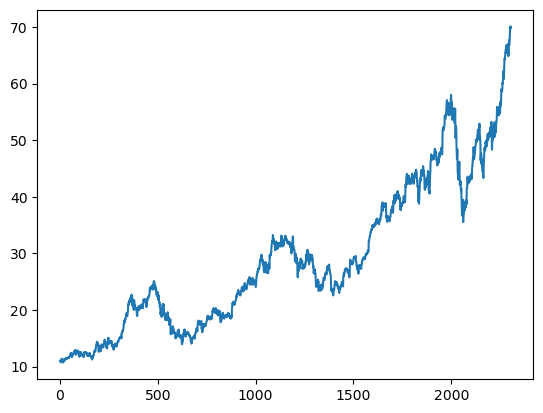

In [7]:
plt.plot(spy.Close)

In [8]:
ma100=spy.Close.rolling(100).mean()
ma100

0             NaN
1             NaN
2             NaN
3             NaN
4             NaN
          ...    
2301    58.311225
2302    58.492900
2303    58.668050
2304    58.846150
2305    59.012150
Name: Close, Length: 2306, dtype: float64

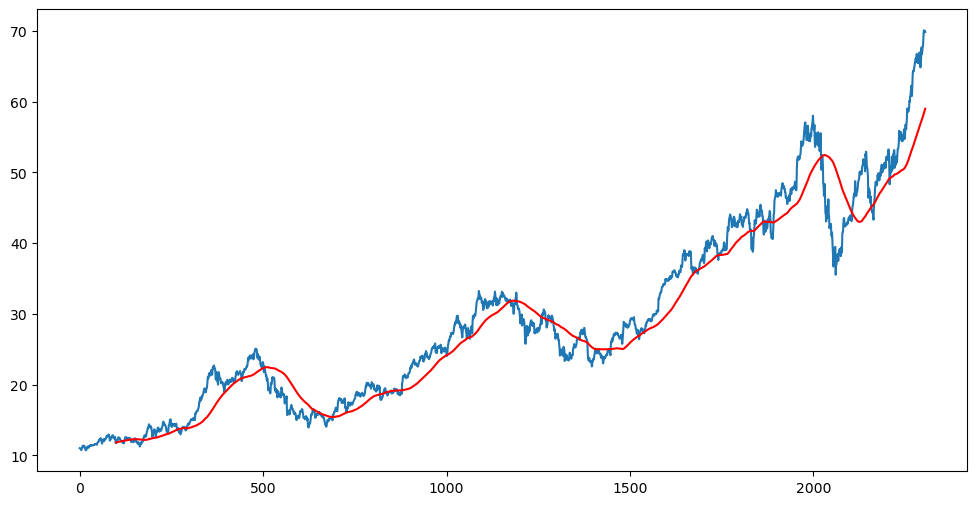

In [9]:
plt.figure(figsize=(12,6))
plt.plot(spy.Close)
plt.plot(ma100,'r')

In [10]:
ma200=spy.Close.rolling(200).mean()
ma200

0             NaN
1             NaN
2             NaN
3             NaN
4             NaN
          ...    
2301    53.470750
2302    53.601850
2303    53.733375
2304    53.867775
2305    54.000938
Name: Close, Length: 2306, dtype: float64

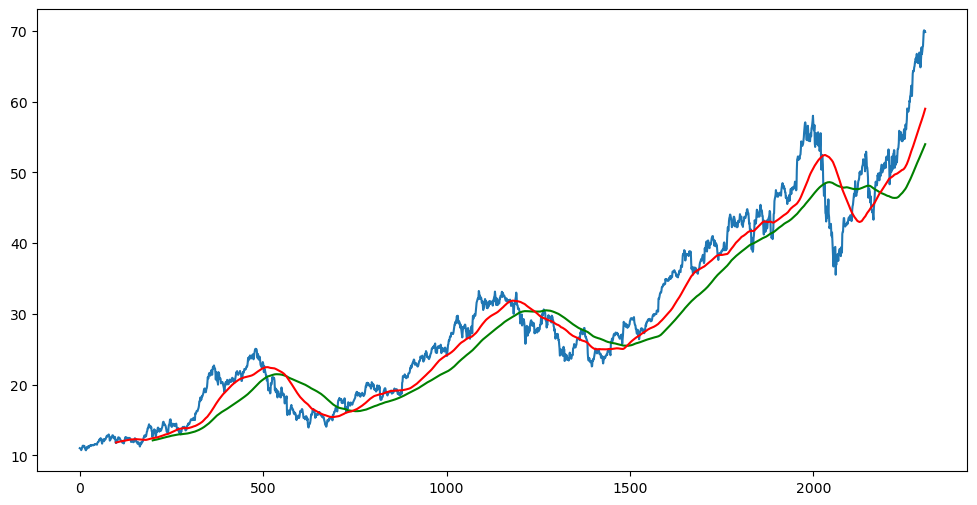

In [11]:
plt.figure(figsize=(12,6))
plt.plot(spy.Close)
plt.plot(ma200,'g')
plt.plot(ma100,'r')

In [12]:
#splitting data into training and testing

data_training=pd.DataFrame(spy['Close'][0:int(len(spy)*0.70)])
data_testing=pd.DataFrame(spy['Close'][int(len(spy)*0.70):int(len(spy))])

print(data_training.shape)
print(data_testing.shape)
                                        

(1614, 1)
(692, 1)


In [13]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler(feature_range=(0,1))


In [14]:
data_training_array=scaler.fit_transform(data_training)
data_training_array

array([[0.01209183],
       [0.01094647],
       [0.01062749],
       ...,
       [0.98355844],
       [0.99959395],
       [0.99451943]])

In [15]:
x_train =[]
y_train=[]

for i in range(100, data_training_array.shape[0]):
    x_train.append(data_training_array[i-100:i])
    y_train.append(data_training_array[i,0])
x_train, y_train=np.array(x_train), np.array(y_train)

In [16]:
from keras.layers import Dense, Dropout, LSTM
from keras import models
from keras.engine.input_layer import Input
from keras.engine.sequential import Sequential

In [17]:
model = Sequential()
model.add(LSTM(units=50, activation='relu', return_sequences=True,
                   input_shape=(x_train.shape[1], 1)))
model.add(Dropout(0.2))

model.add(LSTM(units=60, activation='relu', return_sequences=True))
model.add(Dropout(0.3))

model.add(LSTM(units=80, activation='relu', return_sequences=True))
model.add(Dropout(0.4))

model.add(LSTM(units=120, activation='relu'))
model.add(Dropout(0.5))

model.add(Dense(units=1))

In [18]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 100, 50)           10400     
                                                                 
 dropout (Dropout)           (None, 100, 50)           0         
                                                                 
 lstm_1 (LSTM)               (None, 100, 60)           26640     
                                                                 
 dropout_1 (Dropout)         (None, 100, 60)           0         
                                                                 
 lstm_2 (LSTM)               (None, 100, 80)           45120     
                                                                 
 dropout_2 (Dropout)         (None, 100, 80)           0         
                                                                 
 lstm_3 (LSTM)               (None, 120)               9

In [19]:
model.compile(optimizer='adam', loss='mean_squared_error')
model.fit(x_train, y_train, epochs=50)

Epoch 1/50
48/48 [==============================] - 11s 149ms/step - loss: 0.0791
Epoch 2/50
48/48 [==============================] - 7s 140ms/step - loss: 0.0139
Epoch 3/50
48/48 [==============================] - 7s 145ms/step - loss: 0.0107
Epoch 4/50
48/48 [==============================] - 8s 159ms/step - loss: 0.0099
Epoch 5/50
48/48 [==============================] - 8s 174ms/step - loss: 0.0089
Epoch 6/50
48/48 [==============================] - 7s 153ms/step - loss: 0.0089
Epoch 7/50
48/48 [==============================] - 7s 151ms/step - loss: 0.0081
Epoch 8/50
48/48 [==============================] - 7s 151ms/step - loss: 0.0074
Epoch 9/50
48/48 [==============================] - 7s 152ms/step - loss: 0.0076
Epoch 10/50
48/48 [==============================] - 8s 164ms/step - loss: 0.0083
Epoch 11/50
48/48 [==============================] - 8s 170ms/step - loss: 0.0071
Epoch 12/50
48/48 [==============================] - 10s 201ms/step - loss: 0.0077
Epoch 13/50
48/48 [====

In [20]:
model.save('keras_model.h5')

In [21]:
past_100_days = data_training.tail(100)

In [22]:
final_spy = past_100_days.append(data_testing, ignore_index=True)

C:\Users\yashs\AppData\Local\Temp\ipykernel_3624\433800910.py:1: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  final_spy = past_100_days.append(data_testing, ignore_index=True)


In [23]:
# testing we will get
final_spy.head()

,Close
0,28.430000
1,28.385000
2,27.872499
3,27.897499
4,27.457500


In [24]:
input_data=scaler.fit_transform(final_spy)
input_data

array([[0.04585004],
       [0.0448197 ],
       [0.03308528],
       [0.03365768],
       [0.0235833 ],
       [0.01791641],
       [0.02690329],
       [0.03062392],
       [0.02959358],
       [0.01190613],
       [0.01556955],
       [0.        ],
       [0.00801375],
       [0.02449913],
       [0.02427016],
       [0.02489982],
       [0.0344591 ],
       [0.03485978],
       [0.03159705],
       [0.03480253],
       [0.03354322],
       [0.03291357],
       [0.0275329 ],
       [0.02163708],
       [0.02398399],
       [0.01946194],
       [0.02427016],
       [0.0304522 ],
       [0.03669149],
       [0.04716656],
       [0.04344593],
       [0.05426447],
       [0.05426447],
       [0.05787064],
       [0.05872926],
       [0.0625644 ],
       [0.06433885],
       [0.06496851],
       [0.06056097],
       [0.06187749],
       [0.06611335],
       [0.0632513 ],
       [0.06307959],
       [0.05787064],
       [0.0597596 ],
       [0.05901544],
       [0.06239268],
       [0.069

In [25]:
input_data.shape

(792, 1)

In [26]:
x_test=[]
y_test=[]

for i in range(100, input_data.shape[0]):
    x_test.append(input_data[i-100:i])
    y_test.append(input_data[i,0])

In [27]:
x_test, y_test=np.array(x_test), np.array(y_test)
print(x_test.shape)
print(y_test.shape)

(692, 100, 1)
(692,)


In [28]:
# Making predictions

y_predicted = model.predict(x_test)

22/22 [==============================] - 1s 48ms/step


In [29]:
y_predicted.shape

(692, 1)

In [30]:
scaler.scale_

array([0.02289639])

In [31]:
scale_factor=1/0.02289639
y_predicted=y_predicted*scale_factor
y_test=y_test*scale_factor

<function matplotlib.pyplot.show(close=None, block=None)>

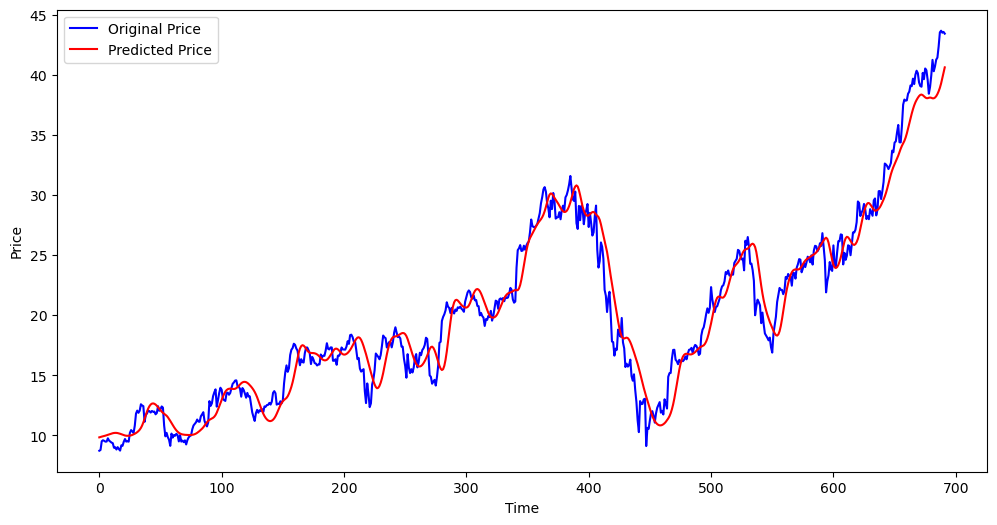

In [32]:
plt.figure(figsize=(12,6))
plt.plot(y_test, 'b', label='Original Price')
plt.plot(y_predicted, 'r', label='Predicted Price')
plt.xlabel('Time')
plt.ylabel('Price')
plt.legend()
plt.show